Build a regression model.

In [6]:
# imports
import requests
from dotenv import load_dotenv
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import sqlite3
import statsmodels.api as sm
from geopy.distance import geodesic


In [58]:
%store -r df
%store -r yelp_restaurant_df_d
%store -r yelp_grocery_df_d
%store -r merged_df3

In [57]:
df

,id,name,latitude,longitude,available_bikes,unavailable_bikes,Number_of_Nearby_Restaurants,Number_of_Bikes,Number_of_Nearby_grocery
0,7a19c49f486d7c0c02b3685d7b240448,10th & Cambie,49.262487,-123.114397,18,18,76,36,22
1,32603a87cfca71d0f7dfa3513bad69d5,Yaletown-Roundhouse Station,49.274566,-123.121817,13,3,54,16,25
2,6d42fa40360f9a6b2bf641c7b8bb2862,Dunsmuir & Beatty,49.279764,-123.110154,11,13,81,24,34
3,66f873d641d448bd1572ab086665a458,12th & Yukon (City Hall),49.260599,-123.113504,8,8,75,16,26
4,485d4d24c803cfde829ab89699fed833,8th & Ash,49.264215,-123.117772,3,13,59,16,18
...,...,...,...,...,...,...,...,...,...
246,3dae5d936bb6b222d135eff52833e7f4,Bute & Davie,49.282047,-123.133057,19,1,79,20,51
247,10acadd77bc21f26a7f09d8c74d4af2d,Robson & Beatty,49.277773,-123.114237,16,4,80,20,30
248,58345bb719f4e570ed4edc9dfa6a68a2,West Mall Swing Space Building,49.263073,-123.254307,5,15,29,20,5
249,261efc67071963969b3f848c66454d97,Orchard Commons,49.259999,-123.250902,12,14,29,26,4


In [28]:
yelp_restaurant_df_d

,name,location,category,latitude,longitude,review_count,rating,distance,type
0,Seaport City Seafood Restaurant,"2425 Cambie Street, Vancouver, BC V5Z 4M5, Canada",dimsum,49.263921,-123.115152,51,4.3,168.615262,restaurant
1,Saku,"548 W Broadway, Vancouver, BC V5Z 1E9, Canada",japanese,49.263101,-123.116675,249,4.3,178.845344,restaurant
2,Marulilu Cafe,"451 W Broadway, Vancouver, BC V5Y 1R4, Canada",cafes,49.263380,-123.114150,289,4.0,102.329817,restaurant
3,La Taqueria Pinche Taco Shop,"2450 Yukon Street, Vancouver, BC V5Z 3V6, Canada",mexican,49.263559,-123.112736,683,4.2,169.517456,restaurant
4,iDen & Quan Ju De Beijing Duck House,"2808 Cambie Street, Vancouver, BC V5Z 2V5, Canada",chinese,49.260210,-123.114845,130,3.5,263.641336,restaurant
...,...,...,...,...,...,...,...,...,...
4972,Freshii,"3351 Wesbrook Mall, Vancouver, BC V6S 0E3, Canada",vegetarian,49.254493,-123.235487,13,2.8,70.443227,restaurant
4974,Blenz Coffee,"3381 Wesbrook Mall, Vancouver, BC V6S 0B1, Canada",coffee,49.254532,-123.235484,29,3.3,59.437337,restaurant
4975,Bubble Waffle Cafe,"105B-6190 Agronomy Road, UBC, Vancouver, BC V6...",waffles,49.261391,-123.246318,0,0.0,1038.485055,restaurant
4976,Cafe Perugia,"2350 Health Sciences Mall, Greater Vancouver A...",cafes,49.262370,-123.246039,14,3.2,1065.119851,restaurant


In [29]:
yelp_grocery_df_d

,name,location,category,latitude,longitude,review_count,rating,distance,type
0,Whole Foods Market,"510 W 8th Ave, Vancouver, BC V5Z 1C5, Canada",grocery,49.264050,-123.115288,253,3.5,185.429032,grocery
1,Save-On-Foods,"2308 Cambie Street, Vancouver, BC V5Z 2T8, Canada",grocery,49.264716,-123.114135,80,2.8,248.630299,grocery
2,Joti's No Frills,"310 W Broadway, Vancouver, BC V5Y 1R2, Canada",grocery,49.262844,-123.111866,68,3.5,187.925979,grocery
3,Sungiven Foods,"555 W 12th Avenue, Unit 42, Vancouver, BC V5Z ...",intlgrocery,49.260902,-123.116883,21,3.3,252.207815,grocery
4,Kin's Farm Market - City Square Mall,"555 W 12th Avenue, Unit 19, Vancouver, BC V5Z ...",markets,49.260874,-123.116373,17,3.5,229.603334,grocery
...,...,...,...,...,...,...,...,...,...
4554,H-Mart,"5728 University Boulevard, Vancouver, BC V6T 1...",intlgrocery,49.266600,-123.242842,6,3.8,692.275530,grocery
4555,Mini Super,"5728 University Boulevard, Suite 102, Vancouve...",grocery,49.267014,-123.242285,2,2.0,726.361428,grocery
4561,Urban Fare,"5380 University Boulevard, Unit 107, leləm̓ Vi...",grocery,49.265734,-123.237070,2,4.0,838.191914,grocery
4565,Save-On-Foods,"5945 Berton Avenue, Vancouver, BC V6S 0B3, Canada",grocery,49.254823,-123.236595,24,2.6,987.178369,grocery


In [59]:
merged_df3



,id,name,latitude,longitude,available_bikes,unavailable_bikes,location,category,review_count,rating,distance,type
0,NaN,Southern Delicacy,49.231350,-123.155937,NaN,NaN,"6055 West Blvd, Vancouver, BC V6M 3X2, Canada",chinese,18.0,4.2,754.415239,restaurant
1,NaN,Sandeul,49.231636,-123.155857,NaN,NaN,"6019 West Blvd, Vancouver, BC V6M 3X2, Canada",korean,7.0,3.9,722.168567,restaurant
2,NaN,Happy Farm Market,49.231702,-123.156009,NaN,NaN,"44 Ave W, Vancouver, BC V6N, Canada",grocery,11.0,3.2,715.984073,grocery
3,NaN,Sushi Bar Ajisai,49.233898,-123.154094,NaN,NaN,"2081 West 42nd Avenue, Vancouver, BC V6M 2B4, ...",sushi,414.0,4.2,472.080397,restaurant
4,NaN,Dollar World Enterprises,49.234250,-123.154580,NaN,NaN,"2090 41st Avenue W, Vancouver, BC V6M 1Y8, Canada",grocery,0.0,0.0,424.298569,grocery
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,NaN,Third Beach Concession,49.301651,-123.156163,NaN,NaN,"7495 Stanley Park Drive, Vancouver, BC V6G 3E2...",burgers,2.0,1.5,35.062425,restaurant
1290,45a4c865db23e1cad0209afa5a799de0,Stanley Park - Third Beach Parking Lot,49.302577,-123.155616,32.0,5.0,NaN,NaN,NaN,NaN,NaN,bike_station
1291,NaN,Busaba Thai Chinese Restaurant,53.559010,-6.789490,NaN,NaN,"Haggard Street, Navan, Co. Meath, Republic of ...",restaurants,0.0,0.0,591.163894,restaurant
1292,NaN,Trim & Healthy,53.559010,-6.789490,NaN,NaN,"Haggard Street, Navan, Co. Meath, Republic of ...",delis,1.0,5.0,591.163894,restaurant


In order to create a dataset that could be used for linear regression, I am using the coordinates of each bike station and obtain the nearby restaurants and grocery stores (within 1000m), and add the information to the bike data frame. The big dataset merged_df3 is not suitable for a regression model because it contains a lot of Nan values. This is a result of the bike and POI datasets do not contain overlapping data.

In [39]:
def haversine_distance(coords1, coords2):
    return geodesic(coords1, coords2).meters

station_restaurant_counts = {}


for index, station in df.iterrows():
    station_coords = (station['latitude'], station['longitude']) 
    nearby_restaurants = yelp_restaurant_df_d[yelp_restaurant_df_d.apply(
        lambda row: haversine_distance(station_coords, (row['latitude'], row['longitude'])) <= 1000, axis=1)]
    station_restaurant_counts[station['id']] = len(nearby_restaurants)

#get number of restaurants near each bike station



In [60]:
def haversine_distance(coords1, coords2):
    return geodesic(coords1, coords2).meters

station_grocery_counts = {}


for index, station in df.iterrows():
    station_coords = (station['latitude'], station['longitude']) 
    nearby_grocery = yelp_grocery_df_d[yelp_grocery_df_d.apply(
        lambda row: haversine_distance(station_coords, (row['latitude'], row['longitude'])) <= 1000, axis=1)]
    station_grocery_counts[station['id']] = len(nearby_grocery)

#get number of grocery stores near each bike station

In [62]:
df['Number_of_Nearby_grocery'] = df['id'].map(station_grocery_counts)
df['Number_of_Nearby_Restaurants'] = df['id'].map(station_restaurant_counts)
df['Number_of_Bikes'] = df['available_bikes'] + df['unavailable_bikes']
# add new columns and data to the dataframe in order to perform regression analysis

Provide model output and an interpretation of the results. 

In [46]:

X = df['Number_of_Nearby_Restaurants']          # Independent variable: Number of Nearby Restaurants
Y = df['Number_of_Bikes']                       # Dependent variable: Number of Bikes
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()


print(model.summary())
#regression model on # of nearby restaurants and number of bikes

                            OLS Regression Results                            
Dep. Variable:        Number_of_Bikes   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.1641
Date:                Wed, 17 Apr 2024   Prob (F-statistic):              0.686
Time:                        19:31:38   Log-Likelihood:                -772.94
No. Observations:                 251   AIC:                             1550.
Df Residuals:                     249   BIC:                             1557.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

The R-squared shows a low value at 0.01 which indicates a poor fit. The p value of the variable at 0.686 means that it is not statistically significant.

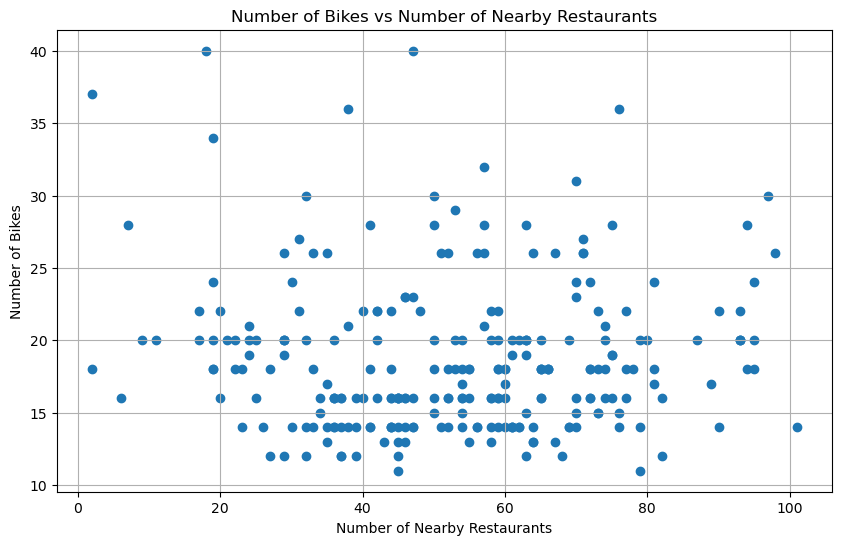

In [42]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Number_of_Nearby_Restaurants'], df['Number_of_Bikes'])
plt.title('Number of Bikes vs Number of Nearby Restaurants')
plt.xlabel('Number of Nearby Restaurants')
plt.ylabel('Number of Bikes')
plt.grid(True)
plt.show()

In [63]:
X = df['Number_of_Nearby_grocery']          # Independent variable: Number of Nearby Grocery Stores
Y = df['Number_of_Bikes']                       # Dependent variable: Number of Bikes
X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()


print(model.summary())
#regression model on # of nearby grocery stores and number of bikes

                            OLS Regression Results                            
Dep. Variable:        Number_of_Bikes   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.487
Date:                Wed, 17 Apr 2024   Prob (F-statistic):              0.224
Time:                        22:24:50   Log-Likelihood:                -772.27
No. Observations:                 251   AIC:                             1549.
Df Residuals:                     249   BIC:                             1556.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

The R-squared shows a low value at 0.06 which indicates a poor fit. The p value of the variable at 0.224 means that it is not statistically significant.

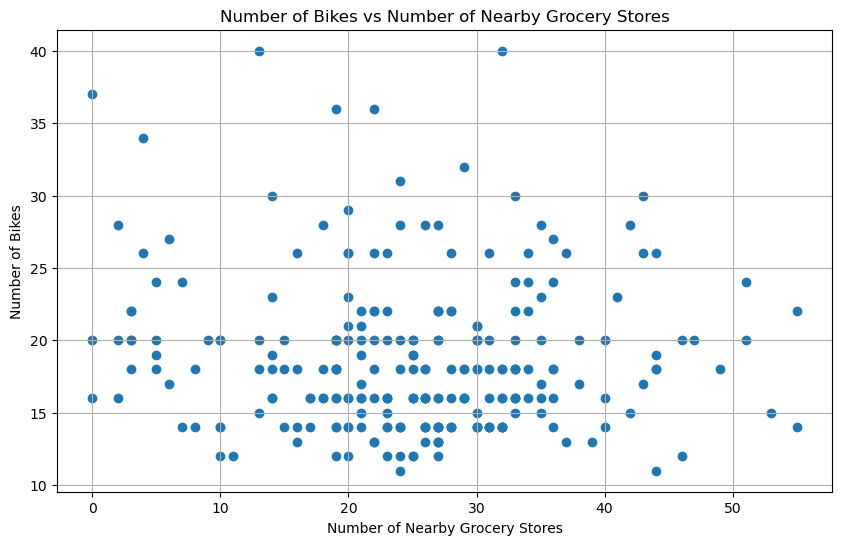

In [64]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Number_of_Nearby_grocery'], df['Number_of_Bikes'])
plt.title('Number of Bikes vs Number of Nearby Grocery Stores')
plt.xlabel('Number of Nearby Grocery Stores')
plt.ylabel('Number of Bikes')
plt.grid(True)
plt.show()

# Stretch

How can you turn the regression model into a classification model?

**Goal setting:**

Instead of predicting the exact number of bikes based on the number of nearby restaurants, we can categorize the bike stations into classes based on the bike availability.
Define classes like "Low Availability," "Medium Availability," and "High Availability" based on available bike of bike counts.

**Data Preparation:**

Assign labels to each bike station based on their availability class. For instance, stations with less than 20% of bikes available could be labeled as "Low Availability."

**Variable Selection:**

Identify relevant features that can help classify bike stations into availability classes. These features could include the number of nearby restaurants and grocery stores, average distances of restaurants and grocery stores to each bike station, average ratings of restaurants and grocery stores (The average calculations require further data manipulation to obtain).

**Model Selection:**

Test logistic regression and evaluate the model's performance using metrics such as accuracy, precision, recall, F1-score, and confusion matrix.

**Implementation:**

Once satisfied with the model's performance, use it to classify new bike stations into availability classes based on the features.